<a href="https://colab.research.google.com/github/Mariam-mostafa3/iris_classification_models/blob/main/iris_classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
import pandas as pd

In [221]:
data=pd.read_csv("/content/Iris_Data.csv")

In [222]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [223]:
y=data["species"]
y

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [224]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y=pd.DataFrame(y)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [225]:
x=data.drop(["species"],axis=1)

In [226]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#splitting the data

In [227]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [228]:
x_train.shape

(105, 4)

In [229]:
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

#1-Logistic Regression


In [230]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l1',solver='saga',max_iter=10000)
lr.fit(x_train,y_train)


LogisticRegression(max_iter=10000, penalty='l1', solver='saga')

In [231]:
y_pred_lr=lr.predict(x_test)

In [232]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#2-SGD classifier

In [233]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='log_loss')
sgd.fit(x_train,y_train)

SGDClassifier(loss='log_loss')

In [234]:
y_pred_sgd=sgd.predict(x_test)
print(classification_report(y_test,y_pred_sgd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#3-SVM classification

In [235]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)

SVC()

In [236]:
y_pred_svm=svm.predict(x_test)
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#4-LDA classification

In [237]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [238]:
y_pred_lda=lda.predict(x_test)
print(classification_report(y_test,y_pred_lda))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#5-KNN

In [239]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [240]:
y_pred_knn=knn.predict(x_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#6-Decision Tree

In [241]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='log_loss',max_depth=6)
dt.fit(x_train,y_train)


DecisionTreeClassifier(criterion='log_loss', max_depth=6)

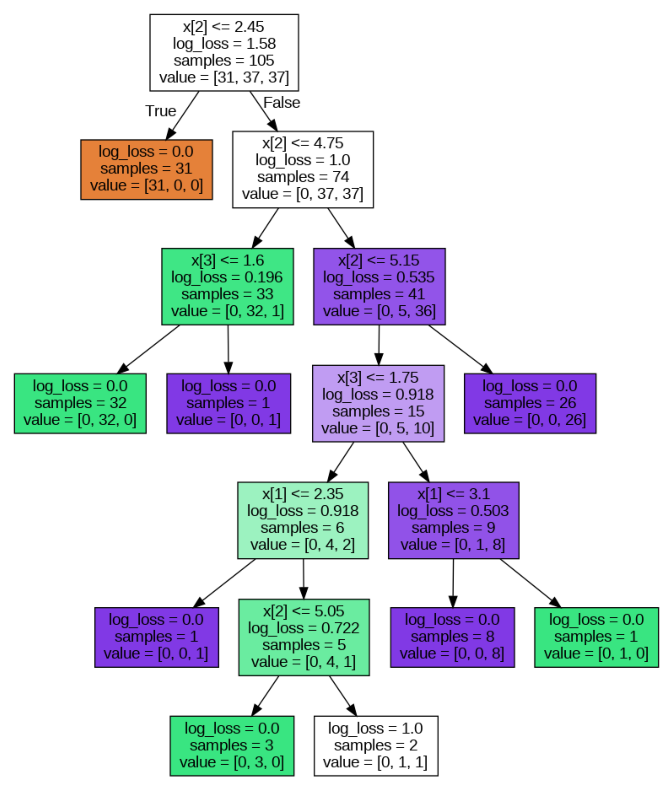

In [242]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import graphviz
export_graphviz(dt,out_file='tree.dot',filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Alternatively, directly render the tree using graphviz
graph = graphviz.Source.from_file('tree.dot')
graph.render(filename='tree', format='png', cleanup=True)  # Creates 'tree.png'

# Display the image using matplotlib
img = plt.imread('tree.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [243]:
y_pred_dt=dt.predict(x_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



#Voting Classifier

In [244]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[('lr',lr),('sgd',sgd),('svm',svm),('lda',lda),('knn',knn),('dt',dt)],voting='hard')
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000, penalty='l1',
                                                 solver='saga')),
                             ('sgd', SGDClassifier(loss='log_loss')),
                             ('svm', SVC()),
                             ('lda', LinearDiscriminantAnalysis()),
                             ('knn', KNeighborsClassifier()),
                             ('dt',
                              DecisionTreeClassifier(criterion='log_loss',
                                                     max_depth=6))])

In [245]:
y_pred=vc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

